In [8]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("/work/aavocone/large_set.csv")

In [9]:

#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")
y50_train = model50.predict_proba(xtrain)[:,1]
y50 = model50.predict_proba(xtest)[:,1]

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")
y100_train = model100.predict_proba(xtrain)[:,1]
y100 = model100.predict_proba(xtest)[:,1]

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")
y200_train = model200.predict_proba(xtrain)[:,1]
y200 = model200.predict_proba(xtest)[:,1]

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")
y500_train = model500.predict_proba(xtrain)[:,1]
y500 = model500.predict_proba(xtest)[:,1]

<BarContainer object of 15 artists>

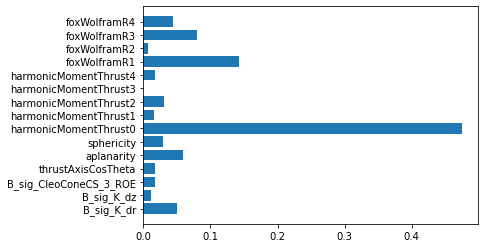

In [10]:
ranking50 = model50.feature_importances_

plt.barh(xtrain.columns,ranking50)